In [1]:
import pandas as pd
import numpy as np

from statistics import stdev
from scipy.stats import mode

from IPython.display import IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns


# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay




%run ../all_studies/us_common_functions.ipynb







#########################################
window_size=10
overlappping_window=False
#########################################




data_dir = '../../data/tt1/'
fig_dir = '../../figure/tt1/'






In [2]:
df = pd.read_csv(data_dir + 'data_2.csv')
df.head()

,Subject,Drive,Perinasal,Palm,Breathing,Heart,Perinasal_Log,Palm_Log,Drive_Label,Gender,Age,STAI,Type_AB,Effort,Frustration,Mental Demand,Performance,Physical Demand,Temporal Demand,NASA Total Sum
0,1,ND,0.004495,57.341256,16.5,69.0,-5.404857,4.049020,ND,Female,69,46,85,14,1.0,3,19,1,1,39.0
1,1,ND,0.004452,57.243300,16.6,68.0,-5.414371,4.047311,ND,Female,69,46,85,14,1.0,3,19,1,1,39.0
2,1,ND,0.004373,57.053396,16.6,67.0,-5.432192,4.043988,ND,Female,69,46,85,14,1.0,3,19,1,1,39.0
3,1,ND,0.004289,56.907952,17.0,68.0,-5.451620,4.041435,ND,Female,69,46,85,14,1.0,3,19,1,1,39.0
4,1,ND,0.004210,56.758544,17.0,67.0,-5.470375,4.038806,ND,Female,69,46,85,14,1.0,3,19,1,1,39.0


In [3]:
df.columns

Index(['Subject', 'Drive', 'Perinasal', 'Palm', 'Breathing', 'Heart',
       'Perinasal_Log', 'Palm_Log', 'Drive_Label', 'Gender', 'Age', 'STAI',
       'Type_AB', 'Effort', 'Frustration', 'Mental Demand', 'Performance',
       'Physical Demand', 'Temporal Demand', 'NASA Total Sum'],
      dtype='object')

In [4]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
print(df.Subject.unique())

Total Subjects: 26
[ 1  2  3  4  5  6  7  8  9 10 13 15 16 17 22 23 24 26 28 29 30 31 32 41
 12 18]


# Creating csv for additional plots for paper -->

In [5]:
df['Treatment'] = df['Drive_Label']
df['TimeElapsed'] = df.groupby(['Subject', 'Treatment']).cumcount()+1
df.to_csv(data_dir + "data_2.1.csv", sep=',', index=False)


plot_df = df.copy()





plot_df['Perinasal_Log'] = np.log(plot_df['Perinasal'])


def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(plot_df.shape)
plot_df = quality_control_phase1(plot_df, 'Heart', 40, 140)
plot_df = quality_control_phase1(plot_df, 'Breathing', 4, 40)
print(plot_df.shape)


plot_df.to_csv(data_dir + "data_2.2.csv", sep=',', index=False)

(34767, 22)
(22037, 22)


In [6]:
# CHECK NA/Null
df.isnull().sum()

Subject               0
Drive                 0
Perinasal          1135
Palm               7358
Breathing          1345
Heart              1345
Perinasal_Log      1135
Palm_Log           7358
Drive_Label           0
Gender                0
Age                   0
STAI                  0
Type_AB               0
Effort                0
Frustration           0
Mental Demand         0
Performance           0
Physical Demand       0
Temporal Demand       0
NASA Total Sum        0
Treatment             0
TimeElapsed           0
dtype: int64

In [7]:
print(df.Treatment.unique())
df = df[df['Treatment'].isin(['ND', 'MD'])]
print(df.Treatment.unique())

['ND' 'CD' 'MD' 'FD']
['ND' 'MD']


In [8]:
df.isnull().sum()

Subject               0
Drive                 0
Perinasal           722
Palm               5023
Breathing          1064
Heart              1064
Perinasal_Log       722
Palm_Log           5023
Drive_Label           0
Gender                0
Age                   0
STAI                  0
Type_AB               0
Effort                0
Frustration           0
Mental Demand         0
Performance           0
Physical Demand       0
Temporal Demand       0
NASA Total Sum        0
Treatment             0
TimeElapsed           0
dtype: int64

In [9]:
df.drop('Palm', axis=1, inplace=True)
df.drop('Palm_Log', axis=1, inplace=True)
df.isnull().sum()

Subject               0
Drive                 0
Perinasal           722
Breathing          1064
Heart              1064
Perinasal_Log       722
Drive_Label           0
Gender                0
Age                   0
STAI                  0
Type_AB               0
Effort                0
Frustration           0
Mental Demand         0
Performance           0
Physical Demand       0
Temporal Demand       0
NASA Total Sum        0
Treatment             0
TimeElapsed           0
dtype: int64

In [10]:
def get_range(df, col):
    return [df[col].min(), df[col].max()]

print(get_range(df, 'Perinasal'))
print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))

[0.00084294014232, 0.0113369897007942]
[49.0, 113.0]
[4.1, 31.4]


In [11]:
invalid_df = df[(140 < df['Heart']) | (df['Heart'] < 40)]
invalid_df.groupby(['Subject'])['Drive'].agg(['nunique','min','max','count'])

,nunique,min,max,count
Subject,,,,


In [12]:
def quality_control_phase1(df, col, validMin, validMax):
    return df[(validMin <= df[col]) & (df[col] <= validMax)]

print(df.shape)
df = quality_control_phase1(df, 'Heart', 40, 140)
df = quality_control_phase1(df, 'Breathing', 4, 40)
print(df.shape)

print(get_range(df, 'Heart'))
print(get_range(df, 'Breathing'))

(22473, 20)
(21409, 20)
[49.0, 113.0]
[4.1, 31.4]


In [13]:
df.groupby(['Subject'])['Treatment'].agg(['nunique','min','max','count'])

,nunique,min,max,count
Subject,,,,
1,2,MD,ND,990
2,2,MD,ND,997
3,2,MD,ND,998
4,2,MD,ND,997
5,2,MD,ND,993
6,2,MD,ND,1001
7,2,MD,ND,948
8,1,ND,ND,479
9,2,MD,ND,997


In [14]:
def get_mean(df, col_name):
    return df.groupby(['Subject', 'Treatment'])[col_name].transform('mean')

def get_baseline_mean(df, col_name):
    return df[col_name].iloc[0]

In [15]:
df['PP_Mean'] = get_mean(df, 'Perinasal_Log')
df['HR_Mean'] = get_mean(df, 'Heart')
df['BR_Mean'] = get_mean(df, 'Breathing')

In [16]:
grouped_df = df.groupby(['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean'], as_index = False)['TimeElapsed'].count()
rb_df = grouped_df[(grouped_df.Treatment == 'ND')][['Subject', 'Treatment', 'PP_Mean', 'HR_Mean', 'BR_Mean']]
rb_df.rename(columns = {
            'PP_Mean': 'PP_RB_Mean',
            'HR_Mean': 'HR_RB_Mean',
            'BR_Mean': 'BR_RB_Mean',}, inplace=True)
rb_df.to_csv(data_dir + 'rb_data.csv', sep=',')

In [17]:
df.Subject.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 15, 16, 17, 22, 23, 24,
       26, 28, 29, 30, 31, 32, 41, 12])

In [18]:
df_arousal = pd.DataFrame()

for subj in df['Subject'].unique():
    subj_df = df.copy()[df.Subject == subj]
    rd_df = subj_df.copy()[subj_df.Treatment == 'ND']
    
    if rd_df.shape[0]:  # If there is any row for Resting Baseline
        subj_df['PP_Normalized'] = subj_df.Perinasal_Log - get_baseline_mean(rd_df, 'PP_Mean')
        subj_df['HR_Normalized'] = subj_df.Heart - get_baseline_mean(rd_df, 'HR_Mean')
        subj_df['BR_Normalized'] = subj_df.Breathing - get_baseline_mean(rd_df, 'BR_Mean')

        df_arousal = df_arousal.append(subj_df)
    
df_arousal.columns

Index(['Subject', 'Drive', 'Perinasal', 'Breathing', 'Heart', 'Perinasal_Log',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'Treatment', 'TimeElapsed',
       'PP_Mean', 'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized',
       'BR_Normalized'],
      dtype='object')

In [19]:
print_row_count(df_arousal, 'Drive')

print(df_arousal.shape)
df_arousal = df_arousal.dropna()
print(df_arousal.shape)

print_row_count(df_arousal, 'Drive')

df_arousal.to_csv(data_dir + "data_2.3.csv", sep=',')
print(df_arousal.columns)

       Drive
Drive       
MD      9378
ND     11568 

(20946, 26)
(20283, 26)
       Drive
Drive       
MD      9091
ND     11192 

Index(['Subject', 'Drive', 'Perinasal', 'Breathing', 'Heart', 'Perinasal_Log',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'Treatment', 'TimeElapsed',
       'PP_Mean', 'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized',
       'BR_Normalized'],
      dtype='object')


In [20]:
print_row_count(df_arousal, 'Treatment')

# Removing 'ND' from dataset, as 'ND' will not be included in the model
print(df_arousal.shape, df_arousal.Treatment.unique())
df_arousal = df_arousal[~df_arousal.Treatment.isin(['ND'])]
print(df_arousal.shape, df_arousal.Treatment.unique())

print_row_count(df_arousal, 'Treatment')

           Treatment
Treatment           
MD              9091
ND             11192 

(20283, 26) ['ND' 'MD']
(9091, 26) ['MD']
           Treatment
Treatment           
MD              9091 



In [21]:
df.shape

(21409, 23)

In [22]:
df_arousal.isnull().sum()

Subject            0
Drive              0
Perinasal          0
Breathing          0
Heart              0
Perinasal_Log      0
Drive_Label        0
Gender             0
Age                0
STAI               0
Type_AB            0
Effort             0
Frustration        0
Mental Demand      0
Performance        0
Physical Demand    0
Temporal Demand    0
NASA Total Sum     0
Treatment          0
TimeElapsed        0
PP_Mean            0
HR_Mean            0
BR_Mean            0
PP_Normalized      0
HR_Normalized      0
BR_Normalized      0
dtype: int64

-----------------------------------------
# Remove the NA rows for PP, HR and BR
-----------------------------------------

In [23]:
print(df_arousal.shape, str(len(df_arousal.Subject.unique())))
df_arousal.dropna(inplace=True)
print(df_arousal.shape, str(len(df_arousal.Subject.unique())))

(9091, 26) 20
(9091, 26) 20


In [24]:
df_arousal.isnull().sum()

Subject            0
Drive              0
Perinasal          0
Breathing          0
Heart              0
Perinasal_Log      0
Drive_Label        0
Gender             0
Age                0
STAI               0
Type_AB            0
Effort             0
Frustration        0
Mental Demand      0
Performance        0
Physical Demand    0
Temporal Demand    0
NASA Total Sum     0
Treatment          0
TimeElapsed        0
PP_Mean            0
HR_Mean            0
BR_Mean            0
PP_Normalized      0
HR_Normalized      0
BR_Normalized      0
dtype: int64

In [25]:
print('Total Subjects: ' + str(len(df.Subject.unique())))
unique_subjs = df.Subject.unique()
print(unique_subjs)
print('\n')


print('After removing NA rows, Total Subjects: ' + str(len(df_arousal.Subject.unique())))
unique_subjs = df_arousal.Subject.unique()
print(unique_subjs)

Total Subjects: 25
[ 1  2  3  4  5  6  7  8  9 10 13 15 16 17 22 23 24 26 28 29 30 31 32 41
 12]


After removing NA rows, Total Subjects: 20
[ 1  2  3  4  5  6  7  9 10 13 15 16 17 22 24 26 29 30 31 32]


In [26]:
def get_mean(df, col_name):
    return df[col_name].mean() 

def get_sd(df, col_name):
    return stdev(df[col_name])

def convert_str(num):
    return(str(round(num, 2)))

def print_mean_sd_stress_marker(signal, mean, sd, stress_marker): 
    print(signal + ":\t" + convert_str(mean) + u" \u00B1 " + convert_str(sd) 
          + "\tstress_marker: " + convert_str(stress_marker))


In [27]:
############################################################################################
pp_diff_mean = get_mean(df_arousal, 'PP_Normalized')
pp_diff_sd = get_sd(df_arousal, 'PP_Normalized')

pp_stress_marker = pp_diff_mean + 0.5*pp_diff_sd

df_arousal.loc[df_arousal.PP_Normalized < pp_stress_marker, 'PP_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_stress_marker, 'PP_Arousal'] = 'stressed'
############################################################################################



############################################################################################
pp_2_stress_marker = pp_diff_mean

df_arousal.loc[df_arousal.PP_Normalized < pp_2_stress_marker, 'PP_Arousal_2'] = 'relaxed'
df_arousal.loc[df_arousal.PP_Normalized >= pp_2_stress_marker, 'PP_Arousal_2'] = 'stressed'
############################################################################################




############################################################################################
hr_diff_mean = get_mean(df_arousal, 'HR_Normalized')
hr_diff_sd = get_sd(df_arousal, 'HR_Normalized')

hr_stress_marker = 0

df_arousal.loc[df_arousal.HR_Normalized < hr_stress_marker, 'HR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.HR_Normalized >= hr_stress_marker, 'HR_Arousal'] = 'stressed'
############################################################################################




############################################################################################
br_diff_mean = get_mean(df_arousal, 'BR_Normalized')
br_diff_sd = get_sd(df_arousal, 'BR_Normalized')

br_stress_marker = 0

df_arousal.loc[df_arousal.BR_Normalized < br_stress_marker, 'BR_Arousal'] = 'relaxed'
df_arousal.loc[df_arousal.BR_Normalized >= br_stress_marker, 'BR_Arousal'] = 'stressed'
############################################################################################

    
    
############################################################################################
print_mean_sd_stress_marker('PP', pp_diff_mean, pp_diff_sd, pp_stress_marker)
print_mean_sd_stress_marker('PP_2', pp_diff_mean, pp_diff_sd, pp_2_stress_marker)
print_mean_sd_stress_marker('HR', hr_diff_mean, hr_diff_sd, hr_stress_marker)
print_mean_sd_stress_marker('BR', br_diff_mean, br_diff_sd, br_stress_marker)
############################################################################################

# ############################################################################################
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_stress_marker, 2))
# print(round(pp_diff_mean, 2), round(pp_diff_sd, 2), round(pp_2_stress_marker, 2))
# print(round(hr_diff_mean, 2), round(hr_diff_sd, 2), round(hr_stress_marker, 2))
# print(round(br_diff_mean, 2), round(br_diff_sd, 2), round(br_stress_marker, 2))
# ############################################################################################



# 'PP_Normalized', 'HR_Normalized', 'BR_Normalized'

PP:	0.07 ± 0.15	stress_marker: 0.15
PP_2:	0.07 ± 0.15	stress_marker: 0.07
HR:	-0.75 ± 6.08	stress_marker: 0
BR:	-0.09 ± 4.15	stress_marker: 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


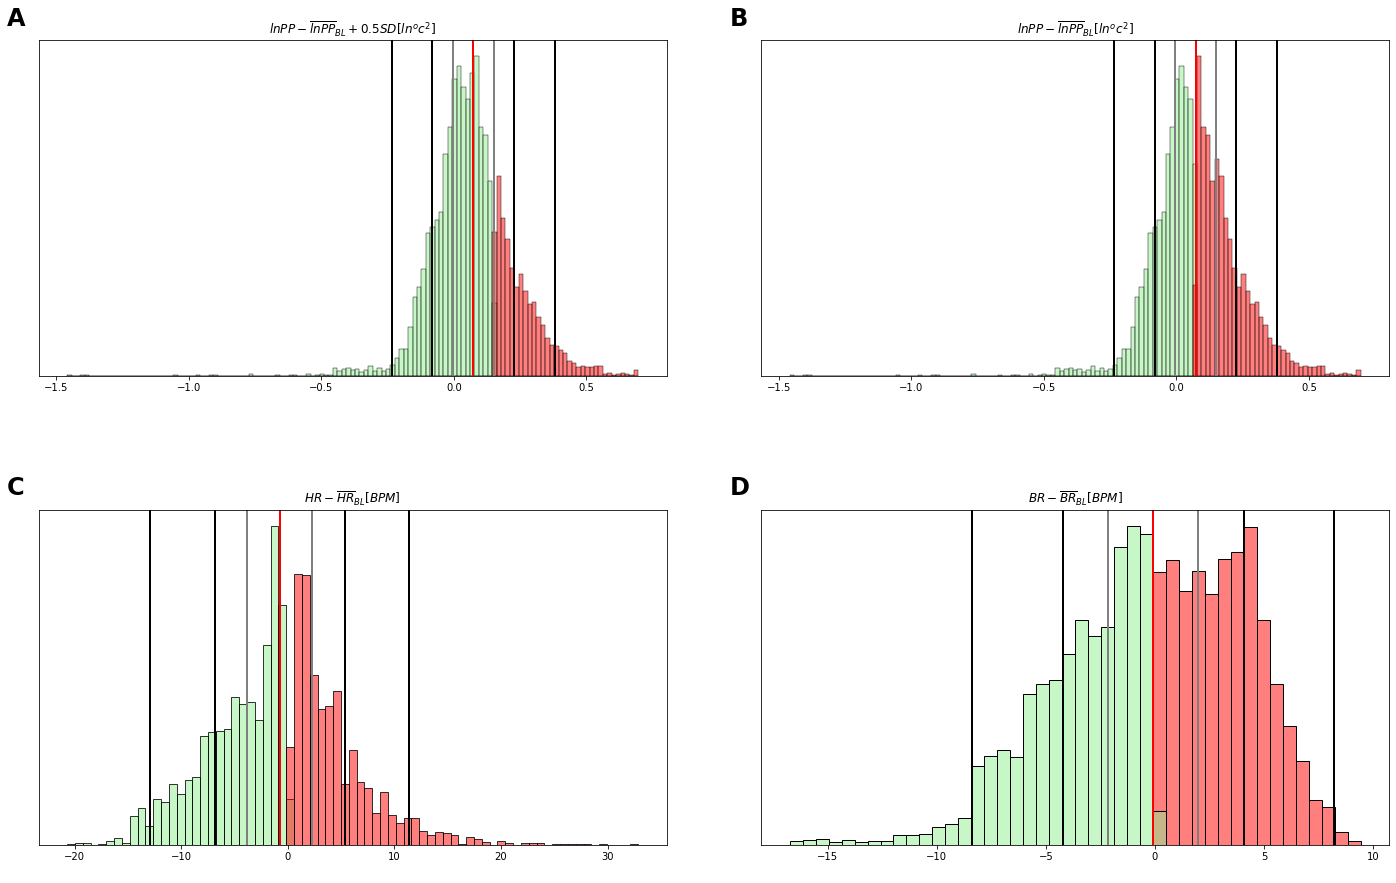

In [28]:
line_width = 2
palette ={"relaxed": "lightgreen", 
          "stressed": "red"}

    
fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C', 'D')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    generate_arousal_extraction_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'tt1_pp_br_hr_arousal_extraction.pdf', dpi=300, bbox_inches='tight')
plt.show()

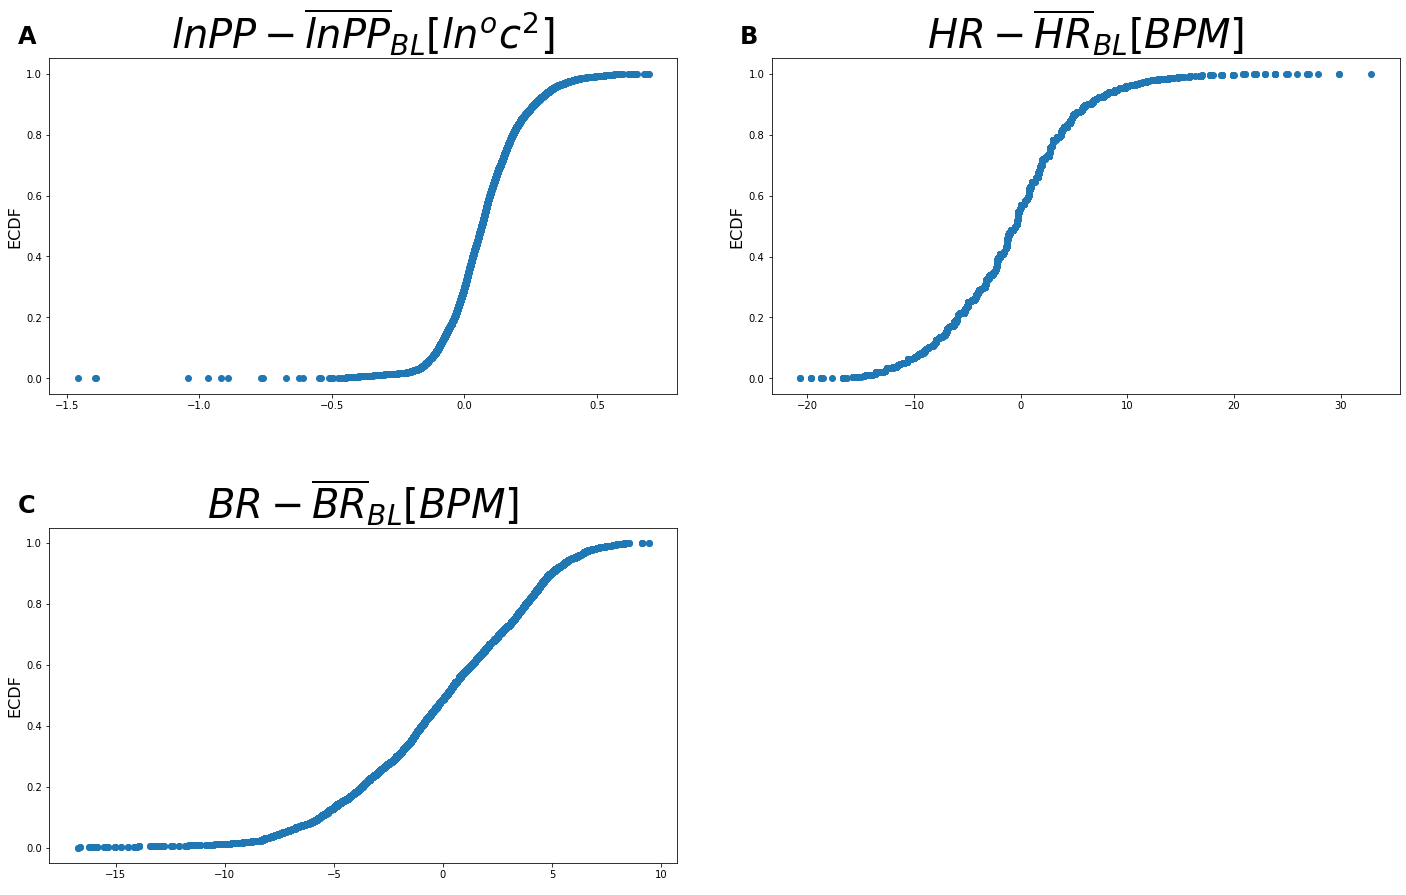

In [29]:
fig = plt.figure()

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig.set_size_inches(20, 12, forward=True)
fig.subplots_adjust(
    top=0.98,
    bottom=0.049,
    left=0.042,
    right=0.98,
    hspace=0.4,
    wspace=0.15
)

for i, label in enumerate(('A', 'B', 'C')):
# for i, label in enumerate(('A')):
    ax = fig.add_subplot(2, 2, i+1)
    df_arousal = generate_ecdf_plots(df_arousal, i)
    ax.text(-0.05, 
            1.1, 
            label, 
            transform=ax.transAxes,
            fontsize=24, 
            fontweight='bold', 
            va='top', 
            ha='left')
    
      
# fig.tight_layout()
fig.savefig(fig_dir + 'tt1_pp_br_hr_ecdf.png', dpi=300, bbox_inches='tight')
fig.savefig(fig_dir + 'tt1_pp_br_hr_ecdf.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
signals = ['PP', 'HR', 'BR']
df_arousal = generate_ecdf_arousal_cols(df_arousal, signals)

In [31]:
df_arousal.to_csv(data_dir + "data_2.5.csv", sep=',')
print(df_arousal.Treatment.unique())
print(df_arousal.columns)

['MD']
Index(['Subject', 'Drive', 'Perinasal', 'Breathing', 'Heart', 'Perinasal_Log',
       'Drive_Label', 'Gender', 'Age', 'STAI', 'Type_AB', 'Effort',
       'Frustration', 'Mental Demand', 'Performance', 'Physical Demand',
       'Temporal Demand', 'NASA Total Sum', 'Treatment', 'TimeElapsed',
       'PP_Mean', 'HR_Mean', 'BR_Mean', 'PP_Normalized', 'HR_Normalized',
       'BR_Normalized', 'PP_Arousal', 'PP_Arousal_2', 'HR_Arousal',
       'BR_Arousal', 'PP_ecdf', 'HR_ecdf', 'BR_ecdf', 'PP_HR_ecdf',
       'PP_BR_ecdf', 'HR_BR_ecdf', 'PP_HR_BR_ecdf', 'PP_Arousal_ecdf',
       'HR_Arousal_ecdf', 'BR_Arousal_ecdf', 'PP_HR_Arousal_ecdf',
       'PP_BR_Arousal_ecdf', 'HR_BR_Arousal_ecdf', 'PP_HR_BR_Arousal_ecdf'],
      dtype='object')


In [32]:
final_df = get_non_overlapping_aggregrated_df(df_arousal)

Subject Processing: 
1
2
3
4
5
6
7
9
10
13
15
16
17
22
24
26
29
30
31
32
                 PP_Arousal_Mode
PP_Arousal_Mode                 
arousal                    34.83
neutral                    33.95
non-arousal                31.22 

                 HR_Arousal_Mode
HR_Arousal_Mode                 
arousal                    35.05
neutral                    32.09
non-arousal                32.86 

                 BR_Arousal_Mode
BR_Arousal_Mode                 
arousal                    33.30
neutral                    34.17
non-arousal                32.53 

                    PP_HR_Arousal_Mode
PP_HR_Arousal_Mode                    
arousal                          25.19
neutral                          53.78
non-arousal                      21.03 

                    PP_BR_Arousal_Mode
PP_BR_Arousal_Mode                    
arousal                          18.73
neutral                          64.62
non-arousal                      16.65 

                    HR_BR_Arousa

In [33]:
final_df.isnull().sum()

Subject                  0
Treatment                0
Age                      0
Effort                   0
Frustration              0
Mental_Demand            0
Performance              0
Physical_Demand          0
Temporal_Demand          0
NASA_Total_Sum           0
PP_Arousal_Mode          0
HR_Arousal_Mode          0
BR_Arousal_Mode          0
PP_HR_Arousal_Mode       0
PP_BR_Arousal_Mode       0
HR_BR_Arousal_Mode       0
PP_HR_BR_Arousal_Mode    0
PP_Mean                  0
PP_Median                0
PP_SD                    0
PP_SS                    0
Hr_Mean                  0
Hr_Median                0
Hr_SD                    0
Hr_SS                    0
Br_Mean                  0
Br_Median                0
Br_SD                    0
Br_SS                    0
Gender_Female            0
Gender_Male              0
dtype: int64

In [34]:
print_row_count(final_df, 'Treatment')

# Removing 'ND' from dataset, as 'ND' will not be included in the model
print(final_df.shape, final_df.Treatment.unique())
final_df = final_df[~final_df.Treatment.isin(['ND'])]
print(final_df.shape, final_df.Treatment.unique())

print_row_count(final_df, 'Treatment')

           Treatment
Treatment           
MD               913 

(913, 31) ['MD']
(913, 31) ['MD']
           Treatment
Treatment           
MD               913 



In [35]:
final_df.to_csv(data_dir + "data_3.csv", sep=',', index=False)

-----------------------------------------------------
# This part is to get info for paper/report
-----------------------------------------------------

In [36]:
final_df = pd.read_csv(data_dir + "data_3.csv")
final_df.head()

,Subject,Treatment,Age,Effort,Frustration,Mental_Demand,Performance,Physical_Demand,Temporal_Demand,NASA_Total_Sum,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,PP_Mean,PP_Median,PP_SD,PP_SS,Hr_Mean,Hr_Median,Hr_SD,Hr_SS,Br_Mean,Br_Median,Br_SD,Br_SS,Gender_Female,Gender_Male
0,1,MD,69,20,18.0,18,4,18,18,96.0,arousal,neutral,non-arousal,arousal,neutral,neutral,neutral,0.351573,0.341204,0.051904,1.260279,1.623077,0.923077,2.201010,69.943787,-7.237949,-7.317949,1.575542,546.220016,1,0
1,1,MD,69,20,18.0,18,4,18,18,96.0,arousal,neutral,non-arousal,arousal,neutral,neutral,neutral,0.204618,0.205720,0.032257,0.428048,1.823077,1.423077,1.646545,57.636095,-2.307949,-2.417949,1.389804,70.650273,1,0
2,1,MD,69,20,18.0,18,4,18,18,96.0,arousal,arousal,neutral,arousal,neutral,arousal,arousal,0.180598,0.174439,0.023698,0.331209,5.023077,4.923077,0.966092,260.713018,0.302051,0.232051,0.245176,1.453350,1,0
3,1,MD,69,20,18.0,18,4,18,18,96.0,arousal,neutral,neutral,arousal,arousal,neutral,arousal,0.150828,0.152782,0.012827,0.228972,1.523077,1.423077,0.875595,30.097633,1.632051,1.782051,0.388730,27.995914,1,0
4,1,MD,69,20,18.0,18,4,18,18,96.0,arousal,arousal,arousal,arousal,arousal,arousal,arousal,0.126932,0.122527,0.015668,0.163328,2.323077,2.423077,0.316228,54.866864,2.592051,2.632051,0.483506,69.291298,1,0


In [37]:
# final_df.groupby('Subject')['Gender_Male'].sum()

print("Male: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.ne(0).sum())))
print("Female: " + str(final_df.groupby(['Subject', 'Gender_Male'])['Gender_Male'].sum().agg(lambda x: x.eq(0).sum())))

Male: 8
Female: 11


In [38]:
print(final_df.Age.min(), final_df.Age.max())

18 85


In [39]:
print("Total Subjects: " + str(len(final_df.Subject.unique())))
print("Total Data: " + str(final_df.shape[0]))

Total Subjects: 19
Total Data: 913


In [40]:
# def get_non_overlapping_window_df(df_arousal):
#     window_df = pd.DataFrame()
    
#     print('Subject Processing: ')
#     for subj in df_arousal.Subject.unique():
# #     for subj in ['T002']:
#         print(subj)
        
#         for drive in df_arousal.Drive.unique():
#             subj_drive_df = df_arousal.copy()[(df_arousal['Subject'] == subj) & (df_arousal['Drive'] == drive )]
#             # print(subj, drive, len(subj_drive_df))

#             i = 0
#             totalRows = subj_drive_df.shape[0]
            
#             while i+2 < totalRows: # proceed for atleast 3 rows
#                 subj_drive_window_df = subj_drive_df.copy().iloc[i: min(totalRows, i+10)]
#                 i += 10
                
#                 subj_drive_window_first_row = subj_drive_window_df.iloc[0]
                
#                 temp_df = pd.DataFrame({'Subject': [subj], 
#                                         'Drive': [drive], 
#                                         'Treatment': [subj_drive_window_first_row.Treatment],
#                                         'Gender': [subj_drive_window_first_row.Gender],
#                                         'Age': [subj_drive_window_first_row.Age],
#                                         'STAI': [subj_drive_window_first_row.STAI],
#                                         'Type_AB': [subj_drive_window_first_row.Type_AB],
#                                         'Effort': [subj_drive_window_first_row.Effort],
#                                         'Frustration': [subj_drive_window_first_row.Frustration],
#                                         'Mental_Demand': [subj_drive_window_first_row['Mental Demand']],
#                                         'Performance': [subj_drive_window_first_row['Performance']],
#                                         'Physical_Demand': [subj_drive_window_first_row['Physical Demand']],
#                                         'Temporal_Demand': [subj_drive_window_first_row['Temporal Demand']],
#                                         'NASA_Total_Sum': [subj_drive_window_first_row['NASA Total Sum']],
#                                        })
                
#                 # temp_df['PP_Arousal_Mode'] = subj_drive_window_df.PP_Arousal.mode()
#                 # temp_df['PP_2_Arousal_Mode'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 # temp_df['HR_Arousal_Mode'] = subj_drive_window_df.HR_Arousal.mode()
#                 # temp_df['BR_Arousal_Mode'] = subj_drive_window_df.BR_Arousal.mode()
                
                
#                 temp_df['PP_Arousal_Mode_Hist'] = subj_drive_window_df.PP_Arousal.mode()
#                 temp_df['PP_2_Arousal_Mode_Hist'] = subj_drive_window_df.PP_Arousal_2.mode()
#                 temp_df['HR_Arousal_Mode_Hist'] = subj_drive_window_df.HR_Arousal.mode()
#                 temp_df['BR_Arousal_Mode_Hist'] = subj_drive_window_df.BR_Arousal.mode()
                
#                 temp_df['PP_Arousal_Mode_ecdf'] = subj_drive_window_df.PP_Arousal_ecdf.mode()
#                 temp_df['HR_Arousal_Mode_ecdf'] = subj_drive_window_df.HR_Arousal_ecdf.mode()
#                 temp_df['BR_Arousal_Mode_ecdf'] = subj_drive_window_df.BR_Arousal_ecdf.mode()
                
                

#                 temp_df['Perinasal_Mean'] = subj_drive_window_df.Perinasal_Log.mean()
#                 temp_df['Perinasal_Median'] = subj_drive_window_df.Perinasal_Log.median()
#                 temp_df['Perinasal_SD'] = stdev(subj_drive_window_df.Perinasal_Log)
#                 temp_df['Perinasal_SS'] = sum_of_squares(subj_drive_window_df.Perinasal_Log)

                
#                 temp_df['Hr_Mean'] = subj_drive_window_df.Heart.mean()
#                 temp_df['Hr_Median'] = subj_drive_window_df.Heart.median()
#                 temp_df['Hr_SD'] = stdev(subj_drive_window_df.Heart)
#                 temp_df['Hr_SS'] = sum_of_squares(subj_drive_window_df.Heart)
                
#                 temp_df['Br_Mean'] = subj_drive_window_df.Breathing.mean()
#                 temp_df['Br_Median'] = subj_drive_window_df.Breathing.median()
#                 temp_df['Br_SD'] = stdev(subj_drive_window_df.Breathing)
#                 temp_df['Br_SS'] = sum_of_squares(subj_drive_window_df.Breathing)
  
#                 window_df = window_df.append(temp_df)
                
#     return window_df

# final_df = get_non_overlapping_window_df(df_arousal)